<a href="https://colab.research.google.com/github/Farruja/Progetto-TPi/blob/main/Popolazione_mondiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensione del dataset: (234, 19)
Colonne disponibili: Index(['place', 'pop1980', 'pop2000', 'pop2010', 'pop2022', 'pop2023',
       'pop2030', 'pop2050', 'country', 'area', 'landAreaKm', 'cca2', 'cca3',
       'netChange', 'growthRate', 'worldPercentage', 'density', 'densityMi',
       'rank'],
      dtype='object')
Valori mancanti: place              0
pop1980            0
pop2000            0
pop2010            0
pop2022            0
pop2023            0
pop2030            0
pop2050            0
country            0
area               0
landAreaKm         0
cca2               0
cca3               0
netChange          8
growthRate         0
worldPercentage    6
density            0
densityMi          0
rank               0
dtype: int64
Statistiche riassuntive:
             place       pop1980       pop2000       pop2010       pop2022  \
count  234.000000  2.340000e+02  2.340000e+02  2.340000e+02  2.340000e+02   
mean   439.085470  1.898462e+07  2.626947e+07  2.984524e+07  3.407441e+0

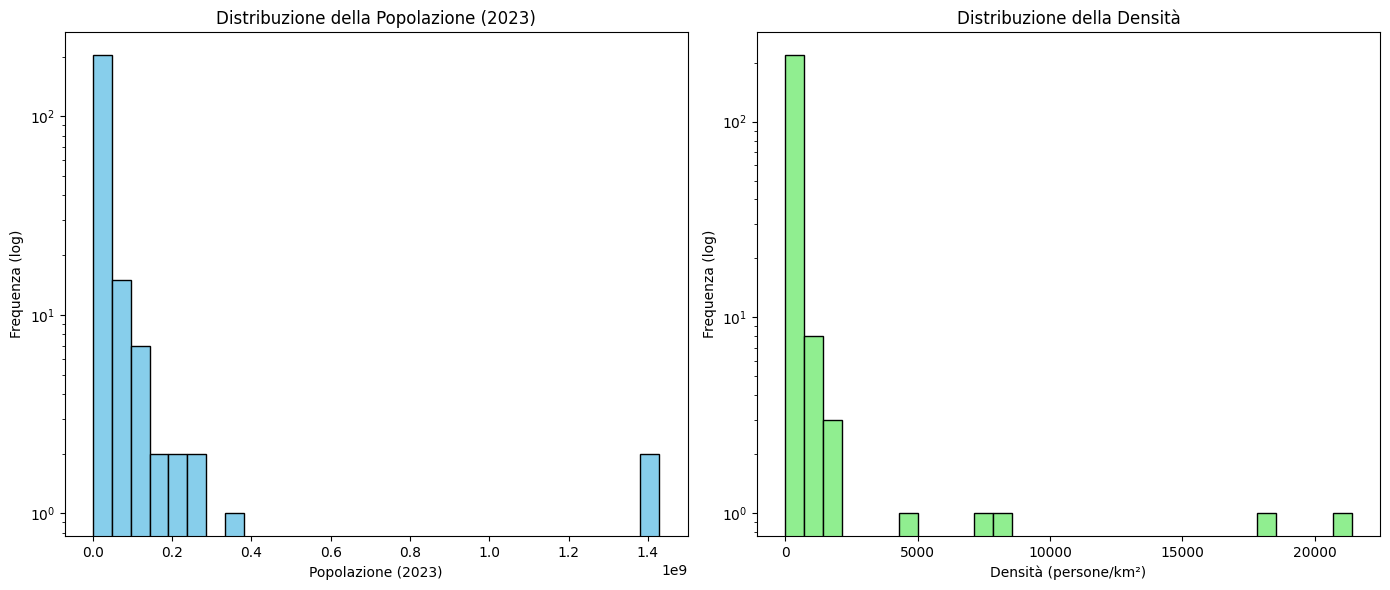

<Figure size 1000x600 with 0 Axes>

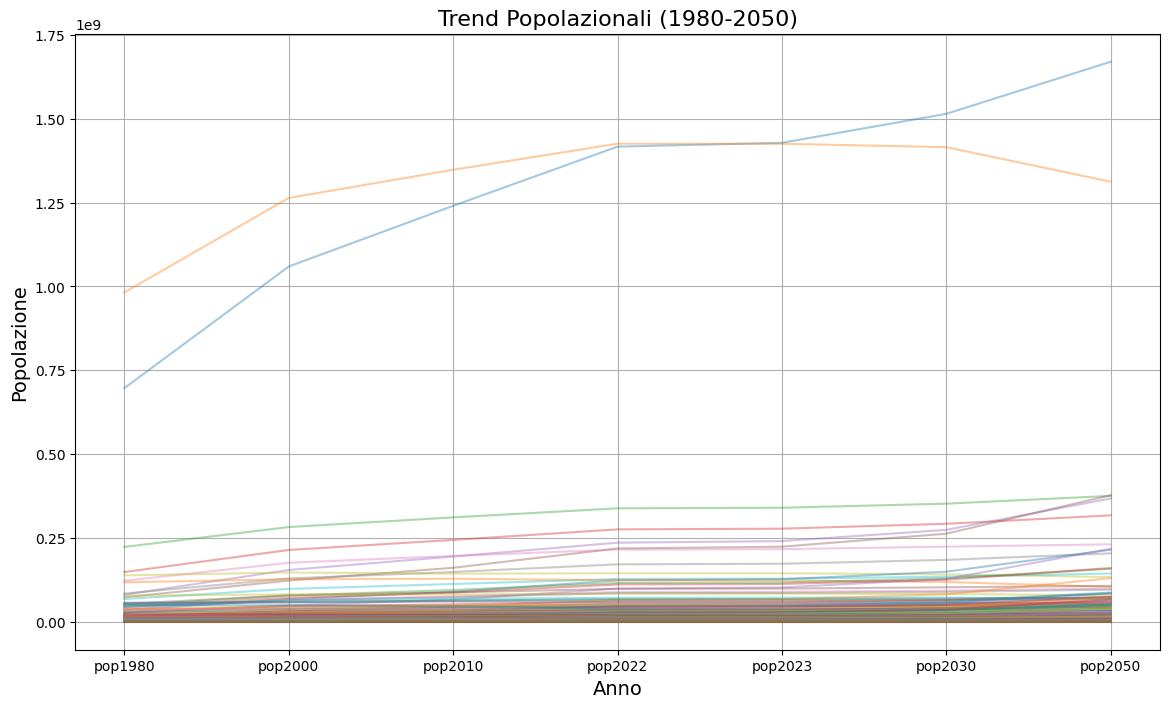

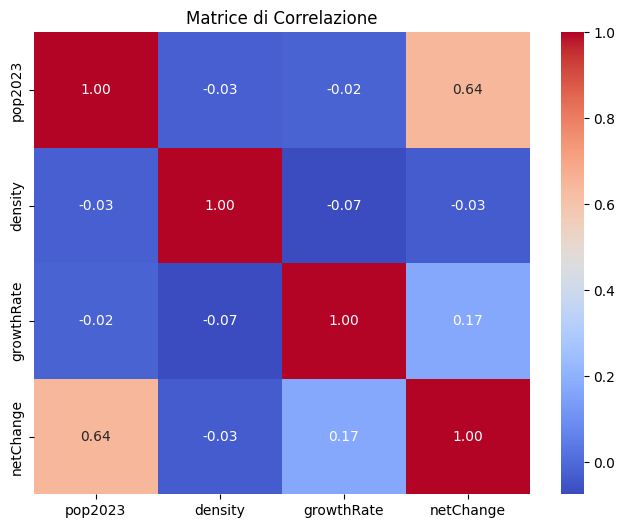

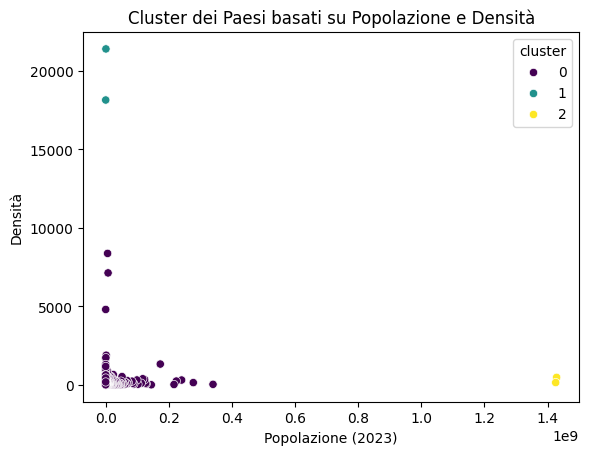

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
file_path = 'countries-table.json'
data = pd.read_json(file_path)

#  Esplorazione iniziale
print("Dimensione del dataset:", data.shape)
print("Colonne disponibili:", data.columns)
print("Valori mancanti:", data.isnull().sum())


#  Analisi descrittiva
summary = data.describe()
print("Statistiche riassuntive:\n", summary)
print("Paesi unici:", data['country'].nunique())
#  Visualizzazione delle distribuzioni
plt.figure(figsize=(14, 6))

# Distribuzione della popolazione 2023
plt.subplot(1, 2, 1)
plt.hist(data['pop2023'], bins=30, color='skyblue', edgecolor='black', log=True)
plt.title('Distribuzione della Popolazione (2023)')
plt.xlabel('Popolazione (2023)')
plt.ylabel('Frequenza (log)')

# Distribuzione della densità
plt.subplot(1, 2, 2)
plt.hist(data['density'], bins=30, color='lightgreen', edgecolor='black', log=True)
plt.title('Distribuzione della Densità')
plt.xlabel('Densità (persone/km²)')
plt.ylabel('Frequenza (log)')

plt.tight_layout()
plt.show()

#Analisi temporale: Trend di popolazione
plt.figure(figsize=(10, 6))
years = ['pop1980', 'pop2000', 'pop2010', 'pop2022', 'pop2023', 'pop2030', 'pop2050']
data.set_index('country')[years].T.plot(alpha=0.4, legend=False, figsize=(14, 8))
plt.title('Trend Popolazionali (1980-2050)', fontsize=16)
plt.xlabel('Anno', fontsize=14)
plt.ylabel('Popolazione', fontsize=14)
plt.grid()
plt.show()

#Analisi delle correlazioni
correlation_matrix = data[['pop2023', 'density', 'growthRate', 'netChange']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

# Cluster Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleziona colonne numeriche per clustering
features = ['pop2023', 'density', 'growthRate', 'area']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features].dropna())

# Esegui K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualizza i cluster
sns.scatterplot(data=data, x='pop2023', y='density', hue='cluster', palette='viridis')
plt.title('Cluster dei Paesi basati su Popolazione e Densità')
plt.xlabel('Popolazione (2023)')
plt.ylabel('Densità')
plt.show()


<ipython-input-8-eb1afbb369c5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_growth, x='country', y='growth_2023_2050', palette='viridis')


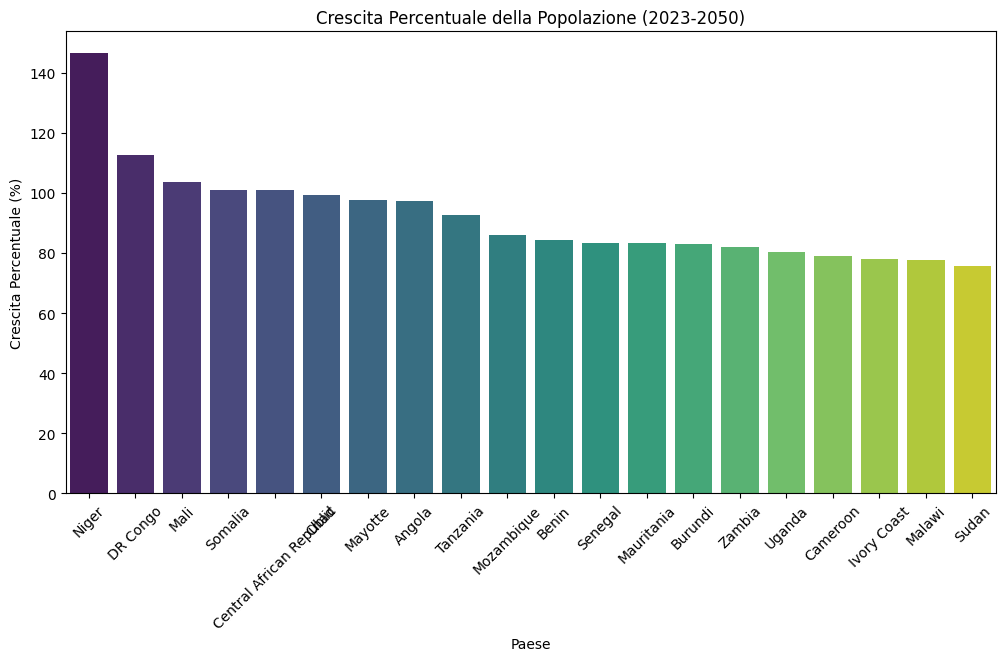

In [ ]:
data['growth_2023_2050'] = ((data['pop2050'] - data['pop2023']) / data['pop2023']) * 100

top_growth = data.nlargest(20, 'growth_2023_2050')

# Visualizza il grafico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_growth, x='country', y='growth_2023_2050', palette='viridis')
plt.xticks(rotation=45)
plt.title('Crescita Percentuale della Popolazione (2023-2050)')
plt.xlabel('Paese')
plt.ylabel('Crescita Percentuale (%)')
plt.show()

#Questa analisi calcola la **crescita percentuale della popolazione** tra il 2023 e il 2050 per ciascun paese. I paesi con la maggiore crescita
#prevista vengono ordinati e visualizzati in un grafico a barre, mostrando quali paesi stanno sperimentando i tassi di crescita demografica
#più elevati nel futuro prossimo.


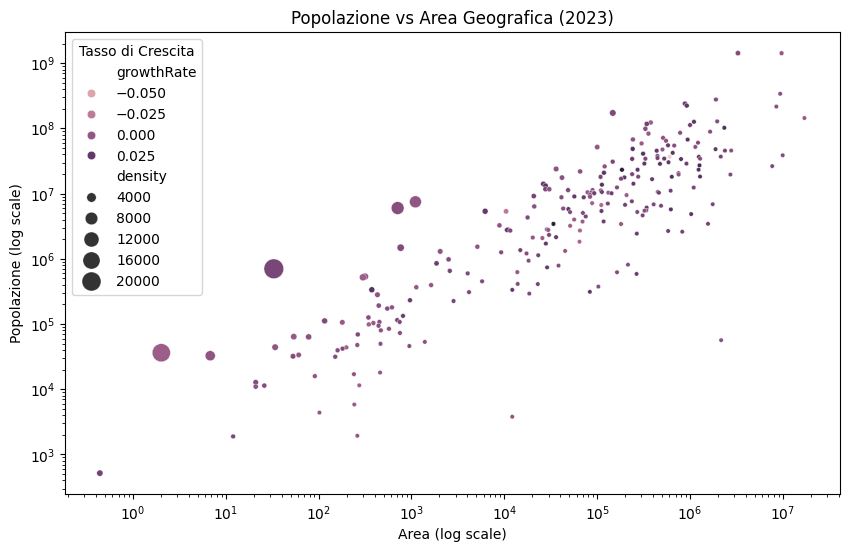

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='area', y='pop2023', hue='growthRate', size='density', sizes=(10, 200))
plt.xscale('log')
plt.yscale('log')
plt.title('Popolazione vs Area Geografica (2023)')
plt.xlabel('Area (log scale)')
plt.ylabel('Popolazione (log scale)')
plt.legend(title='Tasso di Crescita')
plt.show()

#Questa analisi visualizza la relazione tra area geografica e popolazione 2023 su scala logaritmica. I punti rappresentano i paesi, con il
#colore indicante il tasso di crescita e la dimensione proporzionale alla densità di popolazione. Il grafico aiuta a individuare pattern o
#anomalie tra dimensioni territoriali e popolazioni.


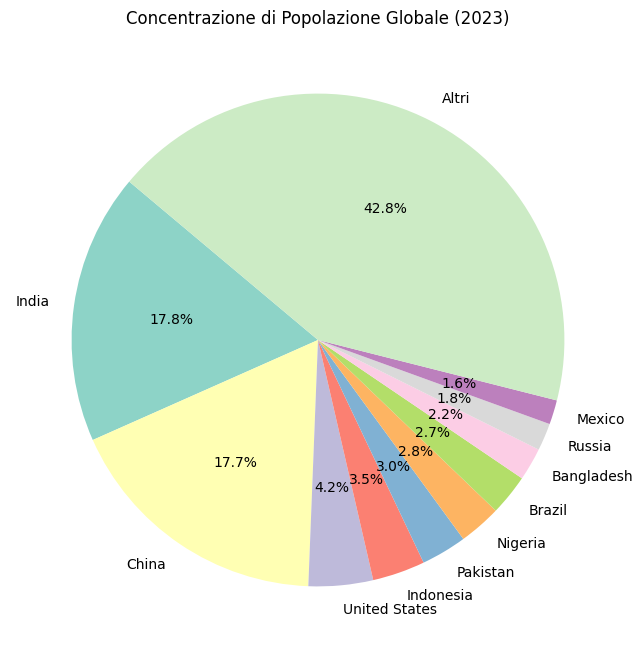

In [ ]:
top10 = data.nlargest(10, 'pop2023')
other_population = data['pop2023'].sum() - top10['pop2023'].sum()

pop_concentration = top10['pop2023'].tolist() + [other_population]
labels = top10['country'].tolist() + ['Altri']

# Grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(pop_concentration, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Concentrazione di Popolazione Globale (2023)')
plt.show()

#Questa analisi calcola la concentrazione di popolazione globale nel 2023, sommando la popolazione dei 10 paesi più popolosi e raggruppando
#il resto come "Altri". Un grafico a torta mostra le proporzioni relative, evidenziando l'impatto demografico dei principali paesi rispetto
#al totale mondiale.


In [ ]:
q1, q3 = data['density'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['density'] < lower_bound) | (data['density'] > upper_bound)]
print("Paesi con densità fuori scala:\n", outliers[['country', 'density']])

#Questa analisi identifica i paesi outlier in base alla densità di popolazione utilizzando il metodo dell'intervallo interquartile (IQR).
#I paesi con densità al di sotto del limite inferiore o al di sopra del limite superiore vengono segnalati, evidenziando valori estremamente
#bassi o elevati rispetto alla distribuzione generale.

Paesi con densità fuori scala:
           country     density
7      Bangladesh   1328.6803
56         Taiwan    660.9188
75         Rwanda    571.3289
103     Hong Kong   7134.8657
113     Singapore   8377.0515
120     Palestine    892.2309
153       Bahrain   1892.3682
156     Mauritius    640.6685
166         Macau  21402.7052
172         Malta   1672.0750
173      Maldives   1736.7367
180       Mayotte    898.3824
185      Barbados    655.8023
194        Jersey    931.6833
197         Aruba    590.4278
205       Bermuda   1186.4630
206      Guernsey   1008.6349
212  Sint Maarten   1300.6471
216        Monaco  18148.5000
217    San Marino    560.7000
218     Gibraltar   4807.0588
219  Saint Martin    641.5400
224         Nauru    639.0000
233  Vatican City   1177.2727


<ipython-input-12-8750935f953d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_data, x='region', y='pop2023', palette='coolwarm')


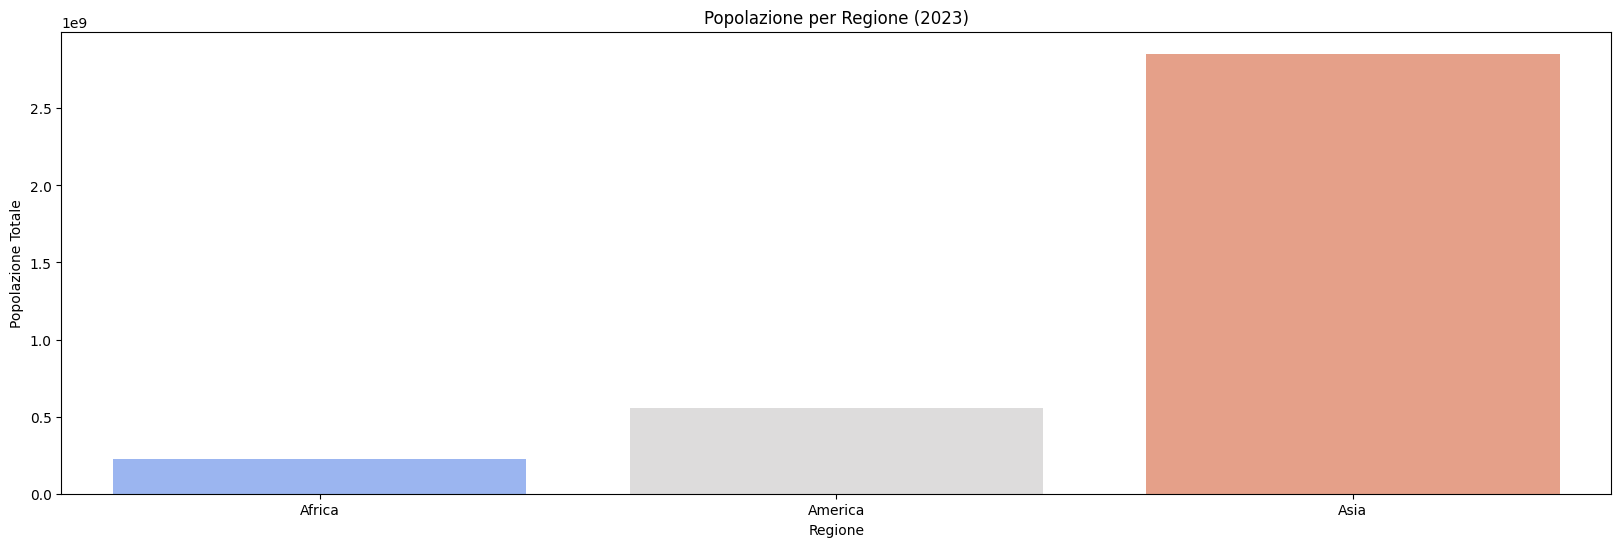

In [ ]:
region_mapping = {
    'IN': 'Asia', 'CN': 'Asia', 'US': 'America', 'BR': 'America', 'NG': 'Africa',
}
data['region'] = data['cca2'].map(region_mapping)

regional_data = data.groupby('region')[['pop2023', 'growthRate']].sum().reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=regional_data, x='region', y='pop2023', palette='coolwarm')
plt.title('Popolazione per Regione (2023)')
plt.xlabel('Regione')
plt.ylabel('Popolazione Totale')
plt.show()

#Questa analisi associa i paesi alle regioni geografiche (es. Asia, Africa, America) utilizzando un mapping. I dati sono poi aggregati
#per regione, sommando la popolazione e il tasso di crescita. Un grafico a barre visualizza la popolazione totale per ogni regione,
#fornendo una panoramica delle concentrazioni demografiche globali.


Paesi con maggiore Efficienza Demografica:
           country  demographic_efficiency
166         Macau              276.094897
113     Singapore               55.064365
180       Mayotte               27.220985
120     Palestine               19.947816
233  Vatican City               18.483182
153       Bahrain               17.476576
77        Burundi               12.889450
75         Rwanda               12.361879
7      Bangladesh               12.071759
194        Jersey                8.867055


<ipython-input-8-6cf5d44a356a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_efficiency, x='country', y='demographic_efficiency', palette='coolwarm')


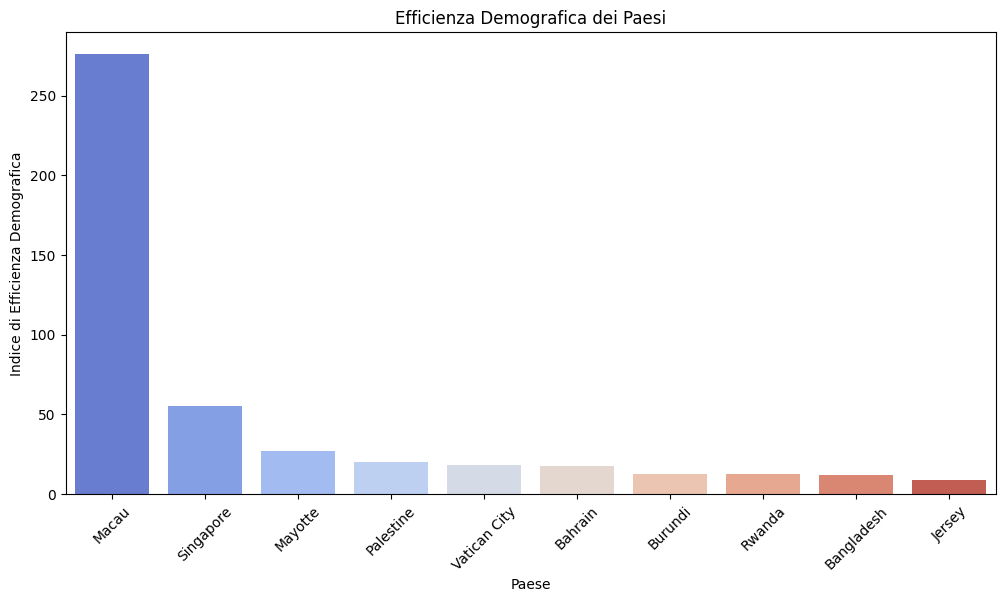

In [ ]:
data['demographic_efficiency'] = data['pop2023'] * data['growthRate'] / data['area']

top_efficiency = data.nlargest(10, 'demographic_efficiency')
print("Paesi con maggiore Efficienza Demografica:\n", top_efficiency[['country', 'demographic_efficiency']])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_efficiency, x='country', y='demographic_efficiency', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Efficienza Demografica dei Paesi')
plt.xlabel('Paese')
plt.ylabel('Indice di Efficienza Demografica')
plt.show()

#Questa analisi calcola un indice di efficienza demografica, definito come il prodotto della popolazione attuale e del tasso di crescita,
#normalizzato per l'area geografica. I 10 paesi con l'indice più alto vengono visualizzati in un grafico a barre, mostrando quali paesi
#ottimizzano meglio crescita e popolazione rispetto alla loro area.


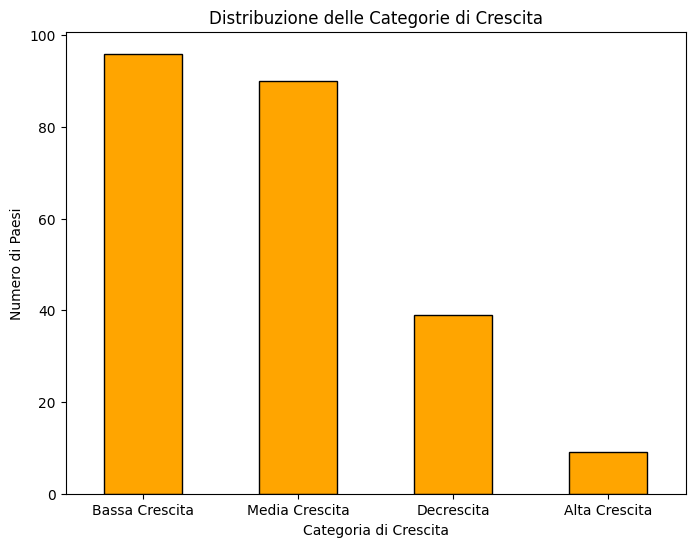

In [ ]:
bins = [-float('inf'), 0, 0.01, 0.03, float('inf')]
labels = ['Decrescita', 'Bassa Crescita', 'Media Crescita', 'Alta Crescita']
data['growth_category'] = pd.cut(data['growthRate'], bins=bins, labels=labels)

growth_distribution = data['growth_category'].value_counts()

plt.figure(figsize=(8, 6))
growth_distribution.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribuzione delle Categorie di Crescita')
plt.xlabel('Categoria di Crescita')
plt.ylabel('Numero di Paesi')
plt.xticks(rotation=0)
plt.show()

#Questa analisi classifica i paesi in categorie di crescita demografica: decrescita, bassa crescita, media crescita e alta crescita, in base
#al tasso di crescita. Un grafico a barre mostra la distribuzione del numero di paesi in ciascuna categoria, evidenziando come si
#distribuiscono globalmente i livelli di crescita demografica.

In [11]:
import folium

# Crea una mappa
world_map = folium.Map(location=[0, 0], zoom_start=2)


for _, row in data.iterrows():
    folium.CircleMarker(
        location=(row['landAreaKm'] / row['densityMi'], row['densityMi']),
        radius=5,
        popup=f"{row['country']} - {row['density']} persone/km²",
        color='blue',
        fill=True
    ).add_to(world_map)

# Mostra mappa
world_map.save('world_density_map.html')


#Questa analisi crea una mappa interattiva utilizzando Folium per rappresentare la densità di popolazione dei paesi. Ogni paese è visualizzato
#come un cerchio, con posizione approssimativa basata su densità e area. I dettagli della densità sono accessibili tramite popup. La mappa
#consente di esplorare visivamente la distribuzione globale della densità demografica.


Paesi con Crescita Negativa:
                           country  growthRate   density     pop2023
40                        Ukraine     -0.0745   63.4184  36744634.0
121                       Lebanon     -0.0247  523.3558   5353930.0
109                      Bulgaria     -0.0139   61.6039   6687717.0
141                     Lithuania     -0.0115   43.4103   2718352.0
150                        Latvia     -0.0110   29.4104   1830211.0
104                        Serbia     -0.0100   81.7411   7149077.0
213                American Samoa     -0.0081  219.5700     43914.0
199  United States Virgin Islands     -0.0072  284.5821     98750.0
136        Bosnia and Herzegovina     -0.0070   62.7119   3210847.0
225             Wallis and Futuna     -0.0060   41.9781     11502.0


<ipython-input-16-af2a3bfb54bd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_negative_growth, x='country', y='growthRate', palette='Reds_r')


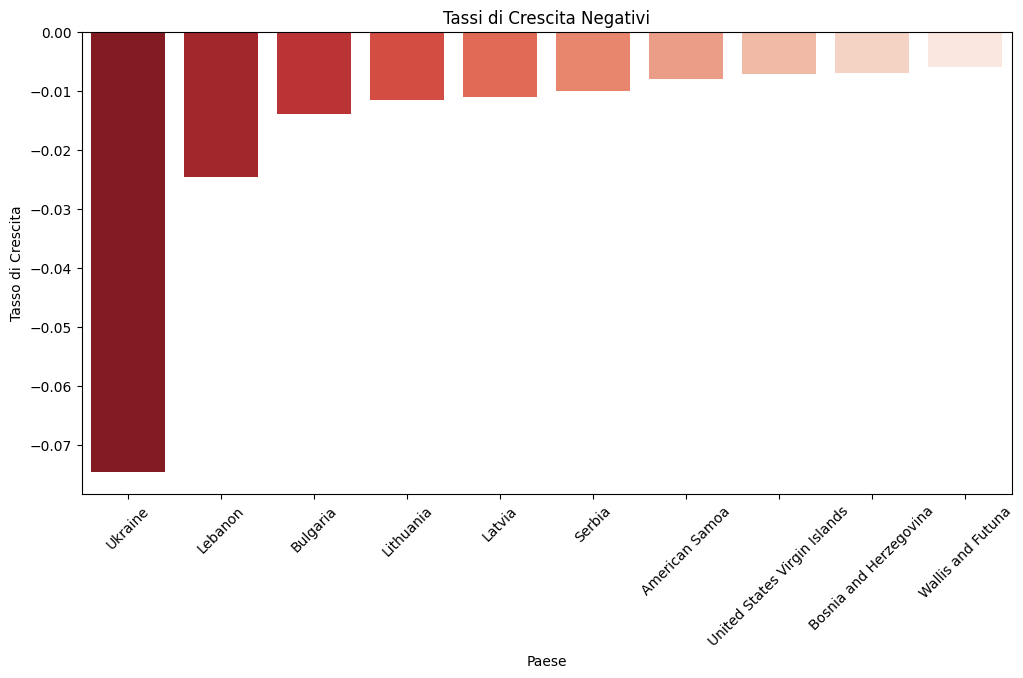

In [ ]:
negative_growth = data[data['growthRate'] < 0]

top_negative_growth = negative_growth.nsmallest(10, 'growthRate')
print("Paesi con Crescita Negativa:\n", top_negative_growth[['country', 'growthRate', 'density', 'pop2023']])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_negative_growth, x='country', y='growthRate', palette='Reds_r')
plt.xticks(rotation=45)
plt.title('Tassi di Crescita Negativi')
plt.xlabel('Paese')
plt.ylabel('Tasso di Crescita')
plt.show()
#Questa analisi identifica i paesi con tasso di crescita demografica negativo, evidenziando i 10 con il declino più marcato. Un grafico a barre visualizza questi paesi,mostrando i
#rispettivi tassi di crescita. L'obiettivo è individuare paesi in declino demografico significativo, correlando eventualmente questo trend a fattori come densità o popolazione totale.


In [12]:
import folium

country_coords = {
    'Afghanistan': [33.93911, 67.709953],
    'Albania': [41.1533, 20.1683],
    'Algeria': [28.0339, 1.6596],
    'Andorra': [42.5078, 1.5211],
    'Angola': [-11.2027, 17.8735],
    'Antigua and Barbuda': [17.0608, -61.7964],
    'Argentina': [-38.4161, -63.6167],
    'Armenia': [40.0691, 45.0382],
    'Australia': [-25.2744, 133.7751],
    'Austria': [47.5162, 14.5501],
    'Azerbaijan': [40.1431, 47.5769],
    'Bahamas': [25.0343, -77.3963],
    'Bahrain': [25.9304, 50.6378],
    'Bangladesh': [23.685, 90.3563],
    'Barbados': [13.1939, -59.5432],
    'Belarus': [53.9, 27.5667],
    'Belgium': [50.8503, 4.3517],
    'Belize': [17.1899, -88.4976],
    'Benin': [9.3075, 2.3158],
    'Bhutan': [27.5147, 90.4336],
    'Bolivia': [-16.2902, -63.5887],
    'Bosnia and Herzegovina': [43.9159, 17.6791],
    'Botswana': [-22.3285, 24.6849],
    'Brazil': [-14.2350, -51.9253],
    'Brunei': [4.5353, 114.7277],
    'Bulgaria': [42.7339, 25.4858],
    'Burkina Faso': [12.2383, -1.5616],
    'Burundi': [-3.3731, 29.9189],
    'Cabo Verde': [16.002, -24.0132],
    'Cambodia': [12.5657, 104.9910],
    'Cameroon': [3.8480, 11.5021],
    'Canada': [56.1304, -106.3468],
    'Central African Republic': [6.6111, 20.9394],
    'Chad': [15.4542, 18.7322],
    'Chile': [-35.6751, -71.5430],
    'China': [35.8617, 104.1954],
    'Colombia': [4.5709, -74.2973],
    'Comoros': [-11.8750, 43.8722],
    'Congo (Congo-Brazzaville)': [-0.2280, 15.8270],
    'Congo (Democratic Republic of the Congo)': [-4.0383, 21.7587],
    'Costa Rica': [9.7489, -83.7534],
    'Croatia': [45.1, 15.2],
    'Cuba': [21.5218, -77.7812],
    'Cyprus': [35.1264, 33.4299],
    'Czech Republic (Czechia)': [49.8175, 15.4720],
    'Denmark': [56.2639, 9.5018],
    'Djibouti': [11.8251, 42.5903],
    'Dominica': [15.4149, -61.3700],
    'Dominican Republic': [18.7357, -70.1627],
    'Ecuador': [-1.8312, -78.1834],
    'Egypt': [26.8201, 30.8025],
    'El Salvador': [13.7942, -88.8965],
    'Equatorial Guinea': [1.6508, 10.2679],
    'Eritrea': [15.1794, 39.7823],
    'Estonia': [58.5953, 25.0136],
    'Eswatini (fmr. "Swaziland")': [-26.5225, 31.4659],
    'Ethiopia': [9.145, 40.4897],
    'Fiji': [-16.5782, 179.4144],
    'Finland': [61.9241, 25.7482],
    'France': [46.6034, 1.8883],
    'Gabon': [0.8037, 11.6094],
    'Gambia': [13.4432, -15.3101],
    'Georgia': [42.3154, 43.3569],
    'Germany': [51.1657, 10.4515],
    'Ghana': [7.9465, -1.0232],
    'Greece': [39.0742, 21.8243],
    'Grenada': [12.2628, -61.6042],
    'Guatemala': [15.7835, -90.2308],
    'Guinea': [9.9456, -9.6966],
    'Guinea-Bissau': [11.8037, -15.1804],
    'Guyana': [4.8604, -58.9302],
    'Haiti': [18.9712, -72.2852],
    'Honduras': [13.9094, -83.4339],
    'Hungary': [47.1625, 19.5033],
    'Iceland': [64.9631, -19.0208],
    'India': [20.5937, 78.9629],
    'Indonesia': [-0.7893, 113.9213],
    'Iran': [32.4279, 53.6880],
    'Iraq': [33.2232, 43.6793],
    'Ireland': [53.4129, -8.2439],
    'Israel': [31.0461, 34.8516],
    'Italy': [41.8719, 12.5674],
    'Jamaica': [18.1096, -77.2975],
    'Japan': [36.2048, 138.2529],
    'Jordan': [30.5852, 36.2384],
    'Kazakhstan': [48.0196, 66.9237],
    'Kenya': [-1.2921, 36.8219],
    'Kiribati': [1.4518, 157.5235],
    'Korea North': [40.3399, 127.5101],
    'Korea South': [35.9078, 127.7669],
    'Kuwait': [29.3759, 47.9774],
    'Kyrgyzstan': [41.2044, 74.7661],
    'Laos': [19.8563, 102.4955],
    'Latvia': [56.8796, 24.6032],
    'Lebanon': [33.8547, 35.8623],
    'Lesotho': [-29.6093, 28.2336],
    'Liberia': [9.4295, -9.4295],
    'Libya': [26.3351, 17.2283],
    'Liechtenstein': [47.1660, 9.5554],
    'Lithuania': [55.1694, 23.8813],
    'Luxembourg': [49.6117, 6.13],
    'Madagascar': [-18.7669, 46.8691],
    'Malawi': [-13.2543, 34.3015],
    'Malaysia': [4.2105, 101.9758],
    'Maldives': [3.2028, 73.2207],
    'Mali': [17.5707, -3.9962],
    'Malta': [35.9375, 14.3754],
    'Marshall Islands': [7.1315, 171.1845],
    'Mauritania': [21.0079, -10.9400],
    'Mauritius': [-20.3484, 57.5522],
    'Mexico': [23.6345, -102.5528],
    'Micronesia': [7.4256, 150.5508],
    'Moldova': [47.4116, 28.3699],
    'Monaco': [43.7333, 7.4167],
    'Mongolia': [46.8625, 103.8467],
    'Montenegro': [42.7087, 19.3744],
    'Morocco': [31.7917, -7.0926],
    'Mozambique': [-18.6657, 35.5296],
    'Myanmar (Burma)': [21.9139, 95.9560],
    'Namibia': [-22.9576, 18.4904],
    'Nauru': [-0.5228, 166.9315],
    'Nepal': [28.1667, 84.25],
    'Netherlands': [52.1326, 5.2913],
    'New Zealand': [-40.9006, 174.8860],
    'Nicaragua': [12.8654, -85.2072],
    'Niger': [17.6078, 8.0817],
    'Nigeria': [9.0820, 8.6753],
    'North Macedonia': [41.6086, 21.7453],
    'Norway': [60.4720, 8.4689],
    'Oman': [21.5126, 55.9232],
    'Pakistan': [30.3753, 69.3451],
    'Palau': [7.5149, 134.5825],
    'Panama': [8.5375, -80.7821],
    'Papua New Guinea': [-6.3149, 143.9555],
    'Paraguay': [-23.4425, -58.4438],
    'Peru': [-9.19, -75.0152],
    'Philippines': [12.8797, 121.7740],
    'Poland': [51.9194, 19.1451],
    'Portugal': [39.3999, -8.2245],
    'Qatar': [25.3548, 51.1839],
    'Romania': [45.9432, 24.9668],
    'Russia': [55.7558, 37.6173],
    'Rwanda': [-1.9403, 29.8739],
    'Saint Kitts and Nevis': [17.3576, -62.782998],
    'Saint Lucia': [13.9094, -60.9789],
    'Saint Vincent and the Grenadines': [12.9843, -61.2872],
    'Samoa': [-13.7590, -172.1046],
    'San Marino': [43.9333, 12.45],
    'Sao Tome and Principe': [0.1864, 6.6131],
    'Saudi Arabia': [23.8859, 45.0792],
    'Senegal': [14.6928, -14.0079],
    'Serbia': [44.0165, 21.0059],
    'Seychelles': [-4.6796, 55.4915],
    'Sierra Leone': [8.4606, -11.7799],
    'Singapore': [1.3521, 103.8198],
    'Slovakia': [48.6690, 19.6990],
    'Slovenia': [46.1511, 14.9955],
    'Solomon Islands': [-29.6093, 28.2336],
    'Somalia': [5.1521, 46.1996],
    'South Africa': [-30.5595, 22.9375],
    'South Sudan': [6.8777, 31.3069],
    'Spain': [40.4637, -3.7492],
    'Sri Lanka': [7.8731, 80.7718],
    'Sudan': [12.8628, 30.8025],
    'Suriname': [3.9196, -56.0278],
    'Sweden': [60.1282, 18.6435],
    'Switzerland': [46.8182, 8.2275],
    'Syria': [34.8021, 38.9968],
    'Taiwan': [23.6978, 120.9605],
    'Tajikistan': [38.8610, 71.2761],
    'Tanzania': [-6.369028, 34.888822],
    'Thailand': [15.8700, 100.9925],
    'Timor-Leste': [-8.8742, 125.7275],
    'Togo': [7.4465, 1.4025],
    'Tonga': [-21.1785, -175.1982],
    'Trinidad and Tobago': [10.6918, -61.2225],
    'Tunisia': [33.8869, 9.5375],
    'Turkey': [38.9637, 35.2433],
    'Turkmenistan': [38.9697, 59.5563],
    'Tuvalu': [-7.1095, 155.3328],
    'Uganda': [1.3733, 32.2903],
    'Ukraine': [48.3794, 31.1656],
    'United Arab Emirates': [23.4241, 53.8478],
    'United Kingdom': [55.3781, -3.4360],
    'United States': [37.0902, -95.7129],
    'Uruguay': [-32.9655, -56.0278],
    'Uzbekistan': [41.3775, 64.5853],
    'Vanuatu': [-15.3767, 166.9592],
    'Vatican City': [41.9029, 12.4534],
    'Venezuela': [6.4238, -66.5897],
    'Vietnam': [14.0583, 108.2772],
    'Yemen': [15.5520, 48.5164],
    'Zambia': [-13.1339, 27.8493],
    'Zimbabwe': [-19.0154, 29.1549]
}


world_map = folium.Map(location=[0, 0], zoom_start=2)


for _, row in data.iterrows():
    country = row['country']
    if country in country_coords:
        lat, lon = country_coords[country]
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            popup=f"{row['country']} - {row['density']} persone/km²",
            color='blue',
            fill=True
        ).add_to(world_map)

# Salva la mappa
world_map.save('world_density_map(secondo-tentativo).html')
